# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 6. Поиск эволюционирующих шаблонов с помощью матричного профиля ряда.**

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from google.colab import drive
drive.mount("/content/drive")

import os
os.chdir('/content/drive/MyDrive/2023-Melekhin-TimeSeriesCourse-main/practice/06 Chains')

Mounted at /content/drive


In [3]:
!pip install stumpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 3.5 MB/s eta 0:00:00


## **Часть 1.** Поиск цепочек временного ряда.

Импорт библиотек и модулей

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stumpy
from sklearn.metrics import mean_squared_error

В первом задании вам предстоит выполнить поиск эволюционирующих шаблонов временного ряда. Выполните считывание набора данных [Rotation Matrix](datasets/Rotation%20Matrix.txt), найдите в нем самую длинную цепочку и выведите индексы начала звеньев этой цепочки.

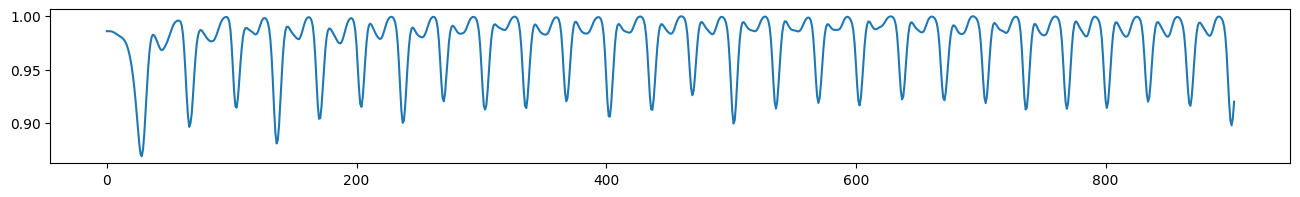

In [5]:
fig, ax = plt.subplots(figsize=(16, 2))
ts = np.loadtxt('datasets/Rotation Matrix.txt')
ax.plot(ts)

In [7]:
m = 50

mp = stumpy.stump(ts, m=m)
S, C = stumpy.allc(mp[:, 2], mp[:, 3])



In [8]:
C

array([ 16,  55, 124, 490, 524, 591])

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

В цепи с окном 50 stumpy находит 6 звеньев

## **Часть 2. Визуализация цепочек**

Выполните визуализацию найденных в прошлом задании цепочек: постройте график временного ряда, на котором выделены звенья цепочек. Также постройте график, на котором изображены только сами звенья.

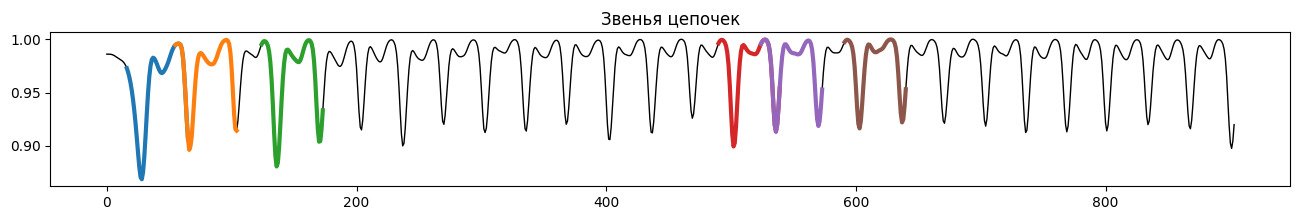

In [9]:
fig, ax = plt.subplots(figsize=(16, 2))
ax.plot(ts, linewidth=1, color='black')
plt.title("Звенья цепочек")
for i in range(C.shape[0]):
    y = ts[C[i]:C[i] + m]
    x = range(C[i], C[i] + m)
    plt.plot(x, y, linewidth=3)

plt.show()

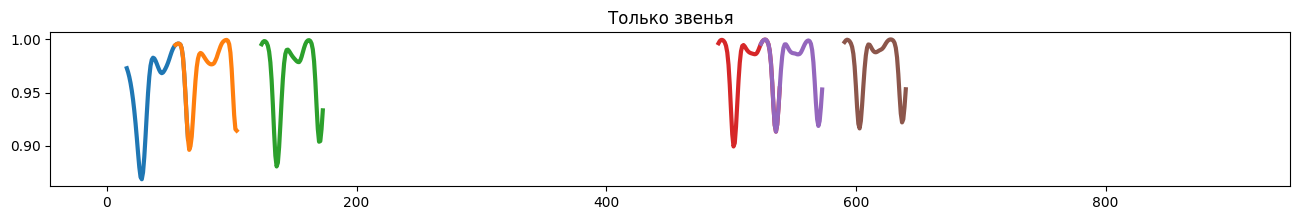

In [10]:
fig, ax = plt.subplots(figsize=(16, 2))
ax.plot(ts, linewidth=1, color='white')
plt.title("Только звенья")
for i in range(C.shape[0]):
    y = ts[C[i]:C[i] + m]
    x = range(C[i], C[i] + m)
    plt.plot(x, y, linewidth=3)

plt.show()

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Звенья не отличаются по форме, если учитывать, что на графике 2 и 5 звенья накладываются друг на друга с 1 и 4, а у 2 звена пропал "хвостик", также звенья отличаются по размерам

## **Часть 3.** Предсказывание значений ряда на основе цепочек.

Предскажите значения последнего звена цепочки, вычислив разность между двумя предыдущими звеньями цепочки. Сравните полученное предсказание с истинным значением.

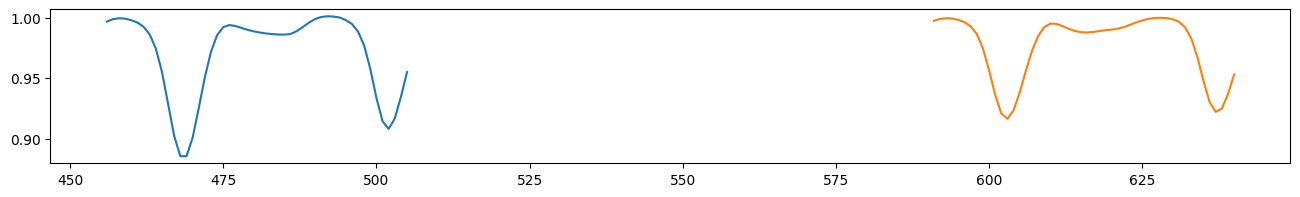

In [11]:
# Определяем первую цепь
x1 = np.array([i for i in range(C[-2], C[-2] + m)])
y1 = ts[C[-2]:C[-2] + m]

# Определяем вторую цепь
x2 = np.array([i for i in range(C[-3], C[-3] + m)])
y2 = ts[C[-3]:C[-3] + m]

# Последнее звено цепочки
x_chain_last = np.array([i for i in range(C[-1], C[-1] + m)])
y_chain_last = ts[C[-1]:C[-1] + m]


# Предсказанная цепь
X_pred = x2 + (x2 - x1)
Y_pred = y2 + (y2 - y1)


fig, ax = plt.subplots(figsize=(16, 2))
for x, y in [(X_pred, Y_pred), (x_chain_last, y_chain_last)]:
    plt.plot(x, y)
plt.show()

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Предсказание по форме почти совпадает, но отличается по размерам и месту положения на оси Х